# `add_lat_lon_ticklabels`

This notebook is a simple example of the GeoCAT-viz function [`add_lat_lon_ticklabels`](../generated/geocat.viz.util.add_lat_lon_ticklabels.html).

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

import geocat.datafiles as gdf
import geocat.viz as gv

In [2]:
# Read in data:

# Open a netCDF data file using xarray default engine and load the data into xarrays, choosing the 2nd timestamp
ds = xr.open_dataset(gdf.get("netcdf_files/uv300.nc")).isel(time=1)

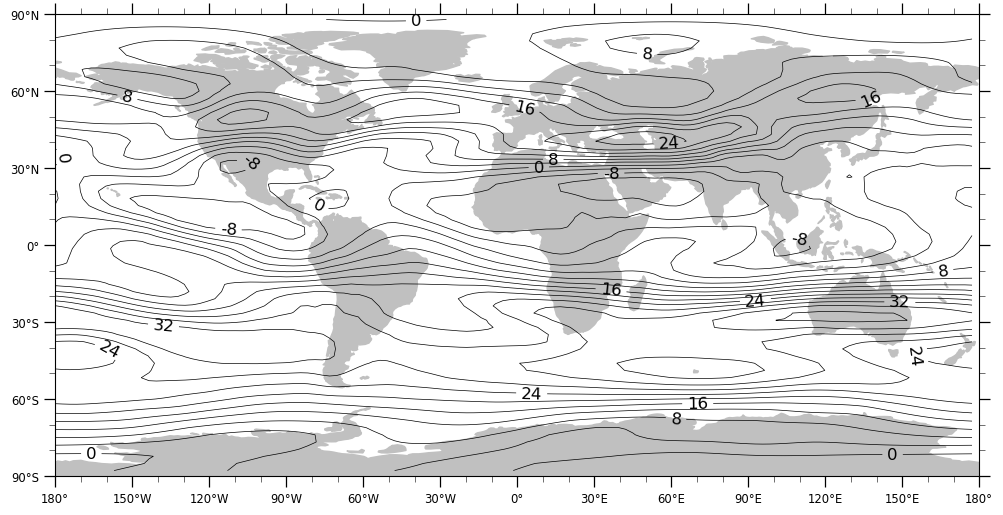

In [3]:
# Plot:

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(12, 6))

# Generate axes using Cartopy projection
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Draw land
ax.add_feature(cfeature.LAND, color='silver')

# Define the contour levels
levels = np.arange(-12, 41, 4)

# Draw contour lines
contour = ds.U.plot.contour(
    ax=ax,
    levels=levels,
    xticks=np.arange(-180, 181, 30),  # nice x ticks
    yticks=np.arange(-90, 91, 30),  # nice y ticks
    transform=projection,  # ds projection
    add_labels=False,  # turn off xarray's automatic Lat, lon labels
    colors="black",  # note plurals in this and following kwargs
    linestyles="-",
    linewidths=0.5)

# Label the contours and set axes title
ax.clabel(contour, [-8, 0, 8, 16, 24, 32], fontsize=12, fmt="%.0f")


# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax)

# Use geocat.viz.util convenience function to make plots look like NCL plots by using latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)

# Show plot
plt.show()